### Lógica Difusa. Sensación Térmica
#### José Ignacio Salas Cáceres

En este programa se establece un método por lógica difusa que sirve para estimar la sensación térmica. La sensación térmica podra ser, fria,templada o calurosa.  
Los parámetros que influiran en esta serán:  
- Humedad relativa: Que solo afecta a la sensación de calor, cuanto más, más calor
- Viento: Que aumenta los efectos de la temperatura, es decir, un viento fuerte, hace notar más calor cuando calor y más frío cuando hace frío
- Temperatura: Es el factor que afecta más a la sensacion térmica.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

# Describimos cuales seran los antecedentes y cual el consecuente, además, definimos los rangos sobre los que trabajaran.

Temperatura = ctrl.Antecedent(np.arange(0, 46, 1), 'Temperatura')
Humedad = ctrl.Antecedent(np.arange(0, 96, 1), 'Humedad')
Viento = ctrl.Antecedent(np.arange(0, 11, 1), 'Viento')

#Vamos a probar diferentes metodos de defuzzificacion.

clima = ctrl.Consequent(np.arange(0, 46, 1), 'clima', defuzzify_method='centroid')

#clima = ctrl.Consequent(np.arange(0, 46, 1), 'clima', defuzzify_method='mom')
#clima = ctrl.Consequent(np.arange(0, 46, 1), 'clima', defuzzify_method='som')
#clima = ctrl.Consequent(np.arange(0, 46, 1), 'clima', defuzzify_method='lom')
#clima = ctrl.Consequent(np.arange(0, 46, 1), 'clima', defuzzify_method='bisector')



#Para la variable temperatura, vamos a definir manualmente los límites, ya que de forma automática nos hara una distribución que establecerá que a 0 grados se puede estar templado.

Temperatura ["baja"] = fuzz.trimf(Temperatura.universe,[0,0,15])
Temperatura ["media"] = fuzz.trimf(Temperatura.universe,[10,20,30])
Temperatura ["alta"] = fuzz.trimf(Temperatura.universe,[26,46,46])


# Los otros factores si que se puedene establecer automaticamente, por lo que simplemente definiremos los nombres que daremos a los intervalos.
Humedad.automf(names= ['baja','media','alta'])
Viento.automf(names= ['debil','medio','fuerte'])


clima ["frio"] = fuzz.trimf(clima.universe,[0,0,15])
clima ["templado"] = fuzz.trimf(clima.universe,[10,20,30])  
clima ["caluroso"] = fuzz.trimf(clima.universe,[26,45,45])


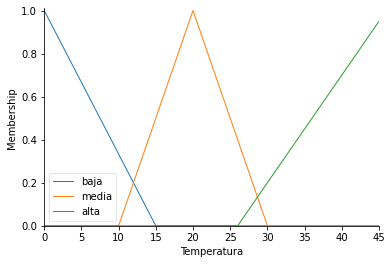

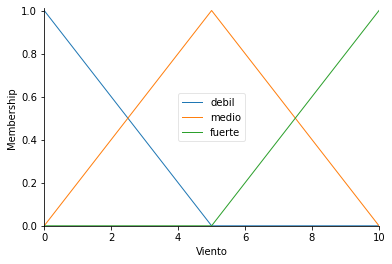

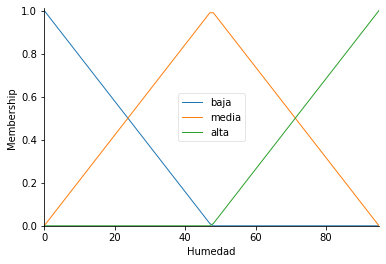

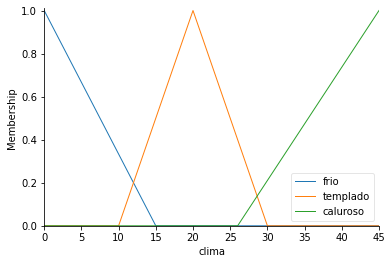

In [2]:
# Para representar visualmente mejor los límites difusos vamos a plotear todas las gráficas.

Temperatura.view()
Viento.view()
Humedad.view()
clima.view()

Por último, solo queda establecer las reglas y agregar el imput.  
Las reglas serán:
+ Temperatura baja y viento fuerte = frio
+ Temperatura alta y viento fuerte = caluroso
+ Temperatura alta y Humedad alta = caluroso
+ Viento medio o Humedad media junto con temperatura media = templado
+ Temperatura fria = frio.

La sensacion térmica  será de: 37.43 grados


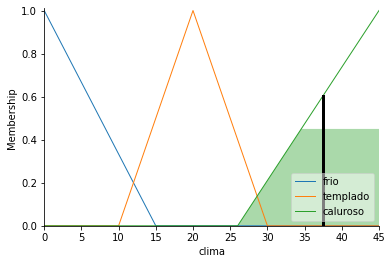

In [15]:
# Establecemos las reglas.

rule1 = ctrl.Rule(Temperatura['baja'] & Viento['fuerte'], clima['frio'])
rule2 = ctrl.Rule(Temperatura['alta'] & Viento['fuerte'], clima['caluroso'])
rule3 = ctrl.Rule(Temperatura['alta'] & Humedad['alta'], clima['caluroso'])
rule4 = ctrl.Rule(Viento['medio'] & Humedad['media']|Temperatura['media'], clima['templado'])
rule5 = ctrl.Rule(Temperatura ['baja'],clima['frio'])
rule6 = ctrl.Rule(Temperatura ['media'],clima['templado'])
rule7 = ctrl.Rule(Temperatura ['alta'],clima['caluroso'])
clima_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7])
Prevision = ctrl.ControlSystemSimulation(clima_ctrl)

#E insertamos los imputs.

Prevision.input['Temperatura'] = 35
Prevision.input['Humedad'] = 80
Prevision.input['Viento'] = 10


# Computamos
Prevision.compute()

# Y presentamos el resultado por pantalla.
print("La sensacion térmica  será de: {:.2f} grados".format(Prevision.output['clima']))
clima.view(sim=Prevision)


Hecho el modelo vamos a probarlo con algunos inputs.

La sensacion térmica  será de: 20.00 grados


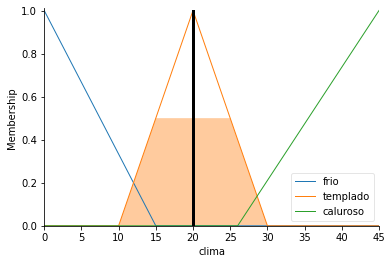

In [16]:
Prevision.input['Temperatura'] = 25
Prevision.input['Humedad'] = 50
Prevision.input['Viento'] = 2


# Computamos
Prevision.compute()
print("La sensacion térmica  será de: {:.2f} grados".format(Prevision.output['clima']))
clima.view(sim=Prevision)

La sensacion térmica  será de: 5.42 grados


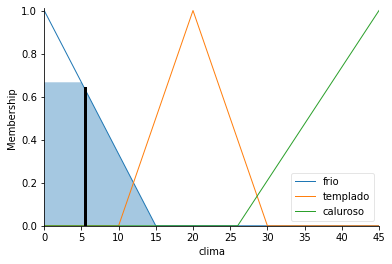

In [18]:
Prevision.input['Temperatura'] = 5
Prevision.input['Humedad'] = 50
Prevision.input['Viento'] = 10


# Computamos
Prevision.compute()
print("La sensacion térmica  será de: {:.2f} grados".format(Prevision.output['clima']))
clima.view(sim=Prevision)

La sensacion térmica  será de: 16.29 grados


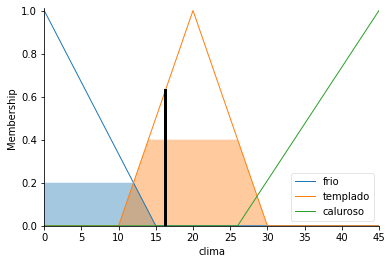

In [19]:
Prevision.input['Temperatura'] = 12
Prevision.input['Humedad'] = 45
Prevision.input['Viento'] = 8


# Computamos
Prevision.compute()
print("La sensacion térmica  será de: {:.2f} grados".format(Prevision.output['clima']))
clima.view(sim=Prevision)